# Исследование объявлений о продаже квартир для определения рыночной стоимости объектов недвижимости.


# План исследования


Шаг I. Просмотр общей информации и изучение данных.

Шаг II. Предобработка данных:
    1. Замена пропущенных значений.
    2. Изменения типа данных.
    
Шаг III. Добавление новых параметров данных: 
     цена кв.метра; день недели, месяц и год публикации объявления;этаж квартиры;соотношение жилой и общей площади, а также          отношение площади кухни к общей.

Шаг IV. Исследовательский анализ данных:
    1. Изучение параметров: площадь, цена, число комнат, высота потолков.
    2. Изучение времени продажи.
    3. Удаление редких и выбивающихся значений.
    4. Изучение факторов, влияющих на стоимость квартиры.
    5. Выборка из 10 населённых пунктов с наибольшим числом объявлений.
    6. Определение центральной зоны на основании средней цены за км.
    7. Изучение в городе Санкт-Петербурге следующих параметров: площадь, цена, число комнат, высота потолков.

### Шаг 1. Изучение общей информации. 

In [1]:
#Импорт библиотек
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


#Чтение данных
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10))
print(' ')
print(' ')

#Изучение данных
print('\x1b[1;94m'+'Общая информация'+'\x1b[0m')
data.info()
print(' ')
print(' ')
print('\x1b[1;94m'+'Уникальные названия населенных пунктов'+'\x1b[0m')
print(data['locality_name'].head(400).unique())
print(' ')
print(' ')
print('\x1b[1;94m'+'Описательная статистика цены квартиры'+'\x1b[0m')
print(data['last_price'].describe())
print(' ')
print('\x1b[1;94m'+'Описательная статистика площади квартиры'+'\x1b[0m')
print(data['total_area'].describe())
print(' ')
print('\x1b[1;94m'+'Описательная статистика кол-ва комнат'+'\x1b[0m')
print(data['rooms'].describe())
print(' ')
print('\x1b[1;94m'+'Описательная статистика высоты потолков'+'\x1b[0m')
print(data['ceiling_height'].describe())
print(' ')
print('\x1b[1;94m'+'Описательная статистика этажей в доме'+'\x1b[0m')
print(data['floors_total'].describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 
 
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null fl

### Вывод

В исходном датасете склеены данные, применим разделитель '\t'. В анализируемой таблице представлено 23699 записей об объекте исследований - квартирах, и их 22 признака, из которых 17 количественных, 3 категориальных, 1 логический и 1 временной.

Присутствуют пропущенные значения, которые в основном имеют случайную природу - собственники объявления не указывали все характеристики квартиры.Также получены не все данные, которые должны были автоматически заполняться на основе картографических данных.

Чтобы узнать разброс значений, среднее значение и медиану, к столбцам 'last price' , 'total_area','ceiling_height','rooms','floors_total'  применялся метод describe. Высота потолков выходит за рамки нормативов, присутствуют квартиры с высотой потолков 1 м, 100м. В названиях населённых пунктов обнаружены дубликаты из-за использования в одинаковых названиях буквы 'е' и 'ё'. 

### Шаг 2. Предобработка данных

##### Общая информация для просмотра пропущенных столбцов:

In [2]:
print('\x1b[1;94m'+'Общая информация для просмотра пропущенных столбцов'+'\x1b[0m')
print(' ')
data.info()
#Пропущены значения по столбцам: ceiling_height,floors_total,living_area,is_apartment,kitchen_area,balcony,locality_name
#airports_nearest, cityCenters_nearest, parks_around3000 ,parks_nearest, ponds_around3000, ponds_nearest, days_exposition

Общая информация для просмотра пропущенных столбцов
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_n

##### Подготовим данные по столбцу 'ceiling height':

In [3]:
#Посмотрим как много значений находятся за пределом нормативных значений для высоты потолков 
#Высота потолка по Снипу должна быть не менее 2.4 м, в элитных домах она редко превышает 10 м. 
print('\x1b[1;94m'+'Кол-во потолков с высотой в пределах нормы:'+'\x1b[0m')
print(' ')
print(len(data.query( '2.4 < ceiling_height < 10')))
#В основном, значения лежат в пределах нормы (14435 из 14504, 99 %). 
#Заменим значения, которые лежат за пределами допустимых значений (меньше 2,4 на минимальное - 2,4; больше 10 на максимальное 10.
data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'] = 2.4
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = 10
#Полученная средняя высота потолка на настоящее время в России находится в границах 2,5 -2,7, что совпадает с нашей медианой.
#Заменим пропущенные значения в столбце с данными о высоте потолка на медиану, взятую из метода describe.
statistics = (data['ceiling_height'].describe())
median = statistics[5]
data['ceiling_height'] = data['ceiling_height'].fillna(median)

Кол-во потолков с высотой в пределах нормы:
 
14435


##### Подготовим данные по столбцу 'locality_name':

In [4]:
#Удалим строки с пропущенными значениями по столбцам с названиями населенных пунктов,т.к. их процент менее 1.
data.dropna(subset= ['locality_name'], inplace=True)
#Избавимся от дубликатов в названиях населённых пунктов
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace("поселок","",) 
data['locality_name'] = data['locality_name'].str.replace("село","",)
data['locality_name'] = data['locality_name'].str.replace("деревня","",)
data['locality_name'] = data['locality_name'].str.replace("городского типа","",)
data['locality_name'] = data['locality_name'].str.replace("городской","",)
data['locality_name'] = data['locality_name'].str.replace("коттеджный","",)
data['locality_name'] = data['locality_name'].str.replace("садовое товарищество", "",)
data['locality_name'] = data['locality_name'].str.replace("садовое некоммеречское товарищество", "",)
print('\x1b[1;94m'+'Вывод уникальных названий населенных пунктов без их определений'+'\x1b[0m')
print(' ')
print(data['locality_name'].tail(200).unique())

Вывод уникальных названий населенных пунктов без их определений
 
['Санкт-Петербург' 'Ломоносов' ' Новое Девяткино' 'Всеволожск' 'Колпино'
 ' Шушары' 'Гатчина' ' Мурино' ' Рабитицы' 'Выборг' ' Ненимяки'
 ' Понтонный' 'Кудрово' '  Мга' 'Красное Село' ' Копорье' 'Никольское'
 ' Кудрово' 'Петергоф' ' Глебычево' ' Парголово' '  имени Свердлова'
 '  Кузьмоловский' ' Елизаветино' ' Бугры' 'Сланцы' ' Суходолье'
 '  Токсово' 'Коммунар' 'Сестрорецк' '  Синявино' 'Пушкин' 'Сосновый Бор'
 ' Дзержинского' 'Тихвин' 'Тосно' ' Рождествено' ' Новый Учхоз']


##### Подготовим данные по столбцу "floors_total":

In [5]:
data_floors_total = data.query('floors_total != "nan"')
 
median = data_floors_total.groupby('locality_name')['floors_total'].median()
locality_name = data_floors_total['locality_name'].unique()
 
def replace_to_median (row):
   
    if np.isnan(row['floors_total']):
        if (row['locality_name'] in locality_name) and (row['floor'] <= median[row['locality_name']]):
            return median[row['locality_name']]         
        return row['floor']
    return row['floors_total']
 
data['floors_total'] = data.apply(replace_to_median, axis=1)

##### Подготовим данные по столбцам 'living_area','kitchen_area':

In [6]:
#Найдём средний коэффициент отношения площади жилого помещения к общей площади  
koeff_living_area = (data['living_area']/ data['total_area']).groupby(data['rooms']).mean()
#Функция для замены пропущенных значений в столбце 'living_area'
def fill_living_area(row):
   
    if row['living_area'] != row['living_area'] and row['rooms'] != 0:
        return row['total_area'] * koeff_living_area[row['rooms']]
   
    elif row['living_area'] != row['living_area'] and row['rooms'] == 0:
        return  row['total_area'] - row['kitchen_area']
   
    elif row['living_area'] == row['living_area']:
        return row['living_area']

data['living_area'] = data.apply(fill_living_area, axis = 1)
#Оставшиеся 11 значений удалим
data.dropna(subset= ['living_area'], inplace=True)

data['living_area'] = data['living_area'].round(2)


#Найдём средний коэффициент отношения площади помещения для кухни к общей площади   
koeff_kitchen_area = (data['kitchen_area']/ data['total_area']).groupby(data['rooms']).mean()

def fill_kitchen_area(row):
   
    if row['kitchen_area'] != row['kitchen_area'] and row['rooms'] != 0:
        return row['total_area'] * koeff_living_area[row['rooms']]
   
    elif row['kitchen_area'] != row['kitchen_area'] and row['rooms'] == 0:
        return  row['total_area'] - row['living_area']
   
    elif row['kitchen_area'] == row['kitchen_area']:
        return row['kitchen_area']

data['kitchen_area'] = data.apply(fill_kitchen_area, axis = 1)

##### Подготовим данные по столбцам "is_apartment", "balcony":

In [7]:
#Предположим, что пропущенные значения по столбцу "is_apartment" это тип жилья - квартиры и заменим на False
data['is_apartment'] = data['is_apartment'].fillna('False')
#Предположим, что пропущенные значения по столбцу "balcony" возникли из-за отсутствия балконов в квартирах,заменим на 0.
data['balcony'] = data['balcony'].fillna(0)

##### Подготовим данные по столбцу "cityCenters_nearest":

In [8]:
#Заменим, где это возможно, пропущенные значения - расстояния до центра медианой. 
import numpy as np

cityCenters_nearest_mean = data.groupby('locality_name')['cityCenters_nearest'].mean().sort_values(ascending=False)

def replace_to_mean(row):
    if np.isnan(row['cityCenters_nearest']):
        return cityCenters_nearest_mean[row['locality_name']]
    return row['cityCenters_nearest']
 
data['cityCenters_nearest'] = data.apply(replace_to_mean, axis=1)

##### Подготовим данные по столбцу "days_exposition":

In [9]:
#Заменим пропущенные значения на медиану
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].describe()[5]

##### Завершающая проверка на количество пропущенных значений:

In [10]:
#Данные по столбцам:airports_nearest, parks_around3000, parks_nearest, ponds_around3000,ponds_nearest оставлены с пустыми зн-ми,
#т.к. для них нет подходящих данных на замену и на результаты исследования они не влияют

print('\x1b[1;94m'+'Проверка на кол-во пропущенных значений'+'\x1b[0m')
print(' ')
data.info()

Проверка на кол-во пропущенных значений
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23636 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23636 non-null int64
last_price              23636 non-null float64
total_area              23636 non-null float64
first_day_exposition    23636 non-null object
rooms                   23636 non-null int64
ceiling_height          23636 non-null float64
floors_total            23636 non-null float64
living_area             23636 non-null float64
floor                   23636 non-null int64
is_apartment            23636 non-null object
studio                  23636 non-null bool
open_plan               23636 non-null bool
kitchen_area            23636 non-null float64
balcony                 23636 non-null float64
locality_name           23636 non-null object
airports_nearest        18108 non-null float64
cityCenters_nearest     18776 non-null float64
parks_around3000        18132 non-null float64
parks_nearest     

### Вывод

1.Пропущены значения по столбцу с данными о высоте потолков. Также были замечены значения, которые находятся за пределами нормы. По СНиПу допустимая высота потолков должна превышать 2.4 м; максимальная высота потолков в квартире редко превышает 6 метров, совсем редкие случаи (10 метров). Сделан срез данных по высоте потолков (от 2.4 до 10 м).Количество выбросов составило менее 1%, решено удалить эти данные. Далее пропущенные значения заменены медианой.

2.Пропущенные значения по столбцу с данными о названиях населенных поселков составляют менее 1%, было принято решение их удалить. Чтобы избавиться от дубликатов, вызванными использованием "е" и "ё", использовался метод replace. Потом этим же методом избавлялись от определений населенных пунктов. 

3.Пропущенные значения по столбцу с данными о количестве этажей были заменены медианой пропущенных значений в конкретном населенном пункте. 

4.Пропущены значения по столбцам с жилой площадью и площадью кухни. Найдены средние коэфициенты площади в зависимости от кол-ва комнат. Использовалась функция, с помощью которой применялся найденный коэффициент к общей площади. Если квартира студия (0 комнат), то необходимая площадь находилась вычитанием из общей площади известной площади (н-р Sкухни=Sобщ - Sжил). 

5.Пропущены значения по столбцу с данными от типе жилья (апартаменты или нет). Предполагается, что пропущенные значения относятся к типу жилья квартиры. Произведена замена на False.

6.Пропущены значения по столбцу с данными о количестве балконов. Отсутствие числа балконов свидетельствует о том, что число балконов равно нулю. Произведена замена на 0.

7.Пропущены значения по столбцу с данными по расстоянию до центра города. Была произведена замена на среднее значение, где это было возможно (где были заполнены данные по населенному пункту, чтобы можно было найти среднее).

8.Пропущенные данные о количестве дней размещения объявления были заменены на медиану этих значений. 

9.Данные по столбцам: airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest оставлены с пустыми значениями, т.к. для них нет подходящих данных на замену и на результаты исследования они не влияют.

In [11]:
#Заменим тип данных по дате публикации со строчного на datetime, чтобы с ними можно было работать. 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#Заменим тип данных c вещественного на целочисленный для наглядности и экономии памяти
data = data.astype({'total_images':'uint8','rooms':'uint8','floor':'uint8','balcony':'uint8'})
data['last_price'] = data['last_price'].astype('int')

#Заменим тип данных c object на bool
data['is_apartment'] = data['is_apartment'].astype('bool')

#Проверяем типы данных
data.dtypes

total_images                     uint8
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            uint8
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            uint8
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          uint8
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Вывод

Тип признака "Дата публикации" объявления был заменен со строчного на временной.В дальнейшем с этим типом данных можно будет проводить операции (извлекать дату, время, год).  
Тип данных total_images','rooms','floor','balcony' был заменен на uint8 для наглядности и экономии памяти.
Тип данных last_price изменен с вещественного на количественный.
Тип данных is_apartment изменен c object на логический. 

### Шаг 3. Добавление новых параметров в таблицу

In [12]:
# Шаг 3. Посчитайте и добавьте в таблицу

# Добавим цену за кв.м.

data['price_m2']=data['last_price']/data['total_area']
data['price_m2']=data['price_m2'].round(2)


#Добавим день недели, месяц, год публикации 

data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year


#Разделим этажи по группам: первый, другой, последний

def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_group'] = data.apply(floor_group,axis=1)


#Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей

data['living_area_koeff'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_area_koeff'] = round(data['kitchen_area'] / data['total_area'], 2)

display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_group,living_area_koeff,kitchen_area_koeff
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,2.0,755.0,95.0,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,...,0.0,NaN,81.0,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,...,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,99.42,9,True,...,3.0,234.0,424.0,408176.10,4,7,2015,другой,0.63,0.63
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,...,NaN,NaN,55.0,95065.79,0,9,2018,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,...,0.0,NaN,155.0,99195.71,3,11,2017,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,41.48,22,True,...,0.0,NaN,95.0,110544.69,3,4,2019,другой,0.58,0.26
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,...,NaN,NaN,189.0,87454.76,2,5,2018,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,0.0,NaN,289.0,88524.59,6,2,2017,другой,0.71,0.11


### Вывод

К данным добавлены следующие столбцы: 
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- сделаны категории "первый", "последний", "другой" этажей квартиры; 
- соотношение жилой и общей площади,  отношение площади кухни к общей.

### Шаг 4. Исследовательский анализ данных.

### Построение гистограмм и изучение каждого параметра:

Text(0, 0.5, 'Частота')

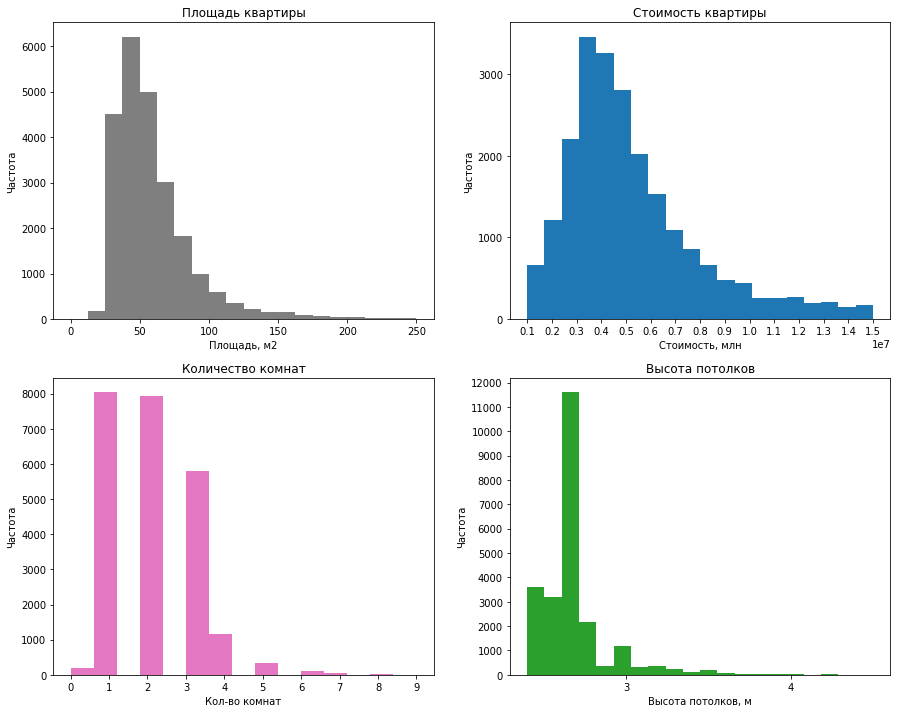

In [13]:
#Cоздание области
fig = plt.figure(figsize=(15,12))


#Построение гистрограммы для параметра "площадь". 

ax_1 = fig.add_subplot(2, 2, 1)
ax_1.set(title = 'Площадь квартиры')
ax_1.hist(data['total_area'], bins = 20, range = (0, 250),color='tab:gray')
#Деление основных осей
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax_1.yaxis.set_major_locator(ticker.MultipleLocator(1000))
#Подпись осей
ax_1.set_xlabel('Площадь, м2')
ax_1.set_ylabel('Частота')


#Построение гистрограммы для параметра "цена квартиры".

ax_2 = fig.add_subplot(2, 2, 2)
ax_2.set(title = 'Стоимость квартиры')
ax_2.hist(data['last_price'],bins = 20, range = (1000000, 15000000),color='tab:blue')
#Деление основных осей
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(1000000))
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(1000))
#Подпись осей
ax_2.set_xlabel('Стоимость, млн')
ax_2.set_ylabel('Частота')


#Построение гистрограммы для параметра "кол-во комнат".

ax_3 = fig.add_subplot(2, 2, 3)
ax_3.set(title = 'Количество комнат')
ax_3.hist(data['rooms'],bins=15,range = (0, 9),color='tab:pink')
#Деление основных осей
ax_3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_3.yaxis.set_major_locator(ticker.MultipleLocator(1000))
#Подпись осей
ax_3.set_xlabel('Кол-во комнат')
ax_3.set_ylabel('Частота')

#Построение гистрограммы для параметра "высота потолков".

ax_4 = fig.add_subplot(2, 2, 4)
ax_4.set(title = 'Высота потолков')
ax_4.hist(data['ceiling_height'],bins=20, range = (2.4, 4.5),color='tab:green')
#Деление основных осей
ax_4.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_4.yaxis.set_major_locator(ticker.MultipleLocator(1000))
#Подпись осей
ax_4.set_xlabel('Высота потолков, м')
ax_4.set_ylabel('Частота')


### Вывод

Исходя из построенных гистограмм для заданных параметров можно сделать следующие выводы:

- Средняя площадь квартиры от 30 до 50 кв.м.После 50 кв.м гистограмма идёт вниз. Квартиры с площадью более 130 кв.м. редки.
- Цена квартиры , в основном, варьируется от 3 до 4 млн. 
- Популярны 1  и 2 комнатные квартиры
- Самые распространенные потолки в квартирах высотой 2.65 м. 


### Изучение времени продажи квартиры:

##### Изучение срока продажи квартиры

Описательная статистика времени продажи квартиры

count    23636.000000
mean       169.278431
std        206.594465
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Количество объявлений, срок продажи которых превышает 430 дней: 2315

Процент аномальных значений: 10 %


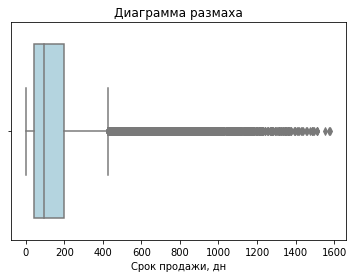

In [14]:
print('\x1b[1;94m'+'Описательная статистика времени продажи квартиры'+'\x1b[0m')
statistics_terms_of_sale = data['days_exposition'].describe()
print('')

#Построим диаграмму размаха
print(statistics_terms_of_sale)
mean = statistics_terms_of_sale [1]
median = statistics_terms_of_sale [5]
sns.boxplot(data['days_exposition'], color='lightblue')
plt.title('Диаграмма размаха')
plt.xlabel('Срок продажи, дн')

#Посчитаем процент выбросов,  Выбросы составляют около 10%
number_outlier=(len(data.query('days_exposition > 430')))
print('')
print('\x1b[1;90m'+'Количество объявлений, срок продажи которых превышает 430 дней:'+'\x1b[0m',number_outlier)

ratio_outlier_term_of_sale = (len(data.query('days_exposition > 430')) / statistics_terms_of_sale[0])*100
print('')
print('\x1b[1;90m'+'Процент аномальных значений:'+'\x1b[0m',round(ratio_outlier_term_of_sale),'%')

##### Гистограмма для изучения срока публикации

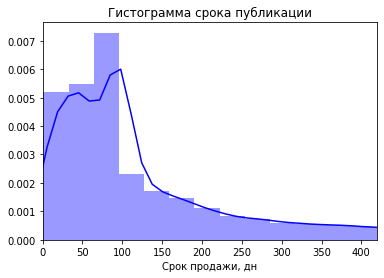

In [15]:
#Построим гистограмму срока публикации, исключив выбросы
sns.distplot(data['days_exposition'], color='blue')
plt.xlim(0,420)
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок продажи, дн')


data['too_slow_selling'] = data['days_exposition'] > 250
data['too_fast_selling'] = data['days_exposition'] < 30

### Вывод

Изучив диаграмму размаха можно сделать вывод, что чаще всего квартиры продаются в течение 100 дней (около 3 месяцев). После 200 дней график равномерно идёт на спад, можно считать, свыше 200 дней квартиры продаются долго.
Из двух графиков видно, что квартиры продаются аномально быстро,если срок не превышает 30-40 дней.

### Удаление редких и выбивающихся значений:

Для оценки разброса посчитан межквартильный размах с помощью метода describe. Далее был построен специальный график - диаграмма размаха, с помощью которой визуально можно увидеть медиану и квартили. За пределами "усов" находятся выбросы. Для более точного исследования и анализа выбросы были удалены. 

##### Удаление аномальных значений по столбцу 'total_area'

Описательная статистика площади квартиры

count    23636.000000
mean        60.334785
std         35.605915
min         12.000000
25%         40.000000
50%         52.000000
75%         69.742500
max        900.000000
Name: total_area, dtype: float64

Количество значений с аномальной площадью: 561

Процент аномальных значений: 2.4%


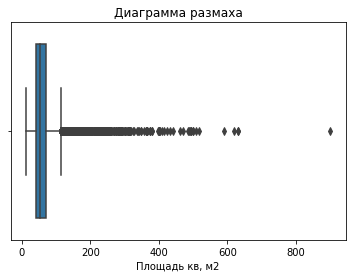

In [16]:
print('\x1b[1;94m'+'Описательная статистика площади квартиры'+'\x1b[0m')
print('')
statistics_total_area = data['total_area'].describe()
print(statistics_total_area)
print('')


sns.boxplot(data['total_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Площадь кв, м2')

#Посчитаем процент выбросов
outlier_total_area = len(data.query('total_area > 150'))
print('\x1b[1;90m'+'Количество значений с аномальной площадью:', outlier_total_area)
print('')
ratio_outlier_total_area = (len(data.query('total_area > 150')) / statistics_total_area[0])
print('\x1b[1;90m'+'Процент аномальных значений: {:.1%}'.format(ratio_outlier_total_area))
data['too_large_area'] = data['total_area'] > 150


##### Удаление аномальных значений по столбцу 'last_price'

Описательная статистика стоимости квартиры

count    2.363600e+04
mean     6.540517e+06
std      1.089117e+07
min      1.219000e+04
25%      3.405000e+06
50%      4.650000e+06
75%      6.799250e+06
max      7.630000e+08
Name: last_price, dtype: float64

Количество значений с аномальной ценой: 1935

Процент аномальных значений: 8.2%


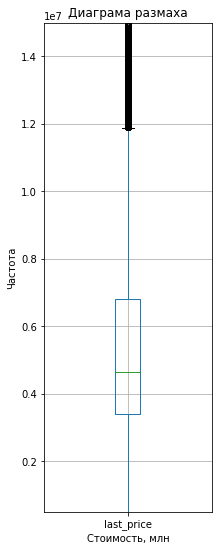

In [17]:
print('\x1b[1;94m'+'Описательная статистика стоимости квартиры'+'\x1b[0m')
print('')
statistics_last_price = data['last_price'].describe()
print(statistics_last_price)
print('')

size = plt.subplots(figsize=(3, 9))
ax = data.boxplot('last_price')
plt.ylim(500000, 15000000)
ax.set(title = 'Диаграма размаха')
ax.set_xlabel('Стоимость, млн')
ax.set_ylabel('Частота')

#Посчитаем процент выбросов
outlier_last_price = len(data.query('last_price > 12000000'))
print('\x1b[1;90m'+'Количество значений с аномальной ценой:', outlier_last_price)
ratio_outlier_last_price = (len(data.query('last_price > 12000000')) / statistics_last_price[0])
print('')
print('\x1b[1;90m'+'Процент аномальных значений: {:.1%}'.format(ratio_outlier_last_price))
data['too_expensive_cost'] = data['last_price'] > 12000000

##### Удаление аномальных значений по столбцу 'rooms'

Описательная статистика стоимости квартиры

count    23636.000000
mean         2.071332
std          1.077762
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Количество значений с аномальным кол-вом комнат: 90

Процент аномальных значений: 8.2%


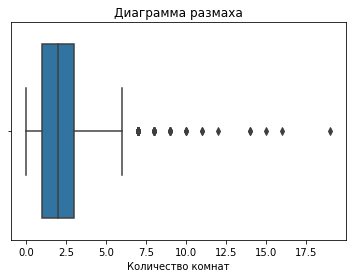

In [18]:
print('\x1b[1;94m'+'Описательная статистика стоимости квартиры'+'\x1b[0m')
print('')
statistics_rooms = data['rooms'].describe()
print(statistics_rooms)
print('')

sns.boxplot(data['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('Количество комнат')

#Посчитаем процент выбросов
outlier_rooms = len(data.query('rooms > 6'))
print('\x1b[1;90m'+'Количество значений с аномальным кол-вом комнат:', outlier_rooms)
ratio_outlier_rooms = len(data.query('rooms > 6')) / (statistics_rooms[0])
print('')
print('\x1b[1;90m'+'Процент аномальных значений: {:.1%}'.format(ratio_outlier_last_price))
data['too_many_rooms'] = data['rooms'] > 6

##### Удаление аномальных значений по столбцу 'ceiling_height'

Описательная статистика высоты потолков

count    23636.000000
mean         2.705639
std          0.331400
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Количество значений с аномальным кол-вом комнат: 1524

Процент аномальных значений: 6.4%


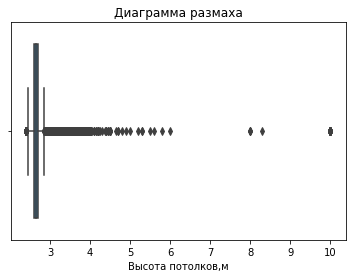

In [19]:
print('\x1b[1;94m'+'Описательная статистика высоты потолков'+'\x1b[0m')
print('')
statistics_ceiling_height = data['ceiling_height'].describe()
print(statistics_ceiling_height)
print('')

sns.boxplot(data['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков,м')

#Посчитаем процент выбросов
outlier_ceiling_height = len(data.query('ceiling_height > 3'))
print('\x1b[1;90m'+'Количество значений с аномальным кол-вом комнат:', outlier_ceiling_height)
ratio_outlier_ceiling_height = (len(data.query('ceiling_height > 3')) / statistics_ceiling_height[0])
print('')
print('\x1b[1;90m'+'Процент аномальных значений: {:.1%}'.format(ratio_outlier_ceiling_height))
data['too_high_ceiling'] = data['ceiling_height'] > 3

##### Удаление аномальных значений

In [20]:
good_data = data[(data['too_slow_selling'] == False) & 
     (data['too_fast_selling'] == False) &
     (data['too_large_area'] == False) &
     (data['too_expensive_cost'] == False) &
     (data['too_many_rooms'] == False) &
     (data['too_high_ceiling'] == False)].reset_index(drop=True)

print('\x1b[1;32m'+'Доля чистых значений составила: {:.1%}'. format(len(good_data) / len(data)))


Доля чистых значений составила: 57.2%


### Вывод

Были удалены редкие и выбивающиеся значения. 
Квартиры площадью более 150 кв.м считаются выбросами. Из диаграммы видно,что после значения в 300 кв.м таких значений единицы - это экстремальные точки. Процент выбросов - 2 %
Выбросы по цене квартиры начинаются от 12 млн. Процент выбросов - 8 %
В основном кол-во комнат в квартире от 0 (студии) до 6. После этого значения находятся экстремальные точки.Процент выбросов - 0.3%
Потолки с высотой более 3-х метров можно считать аномальными. Процент выбросов - 6%

После удаления аномальных значений, доля чистых составила 57%.

### Факторы, влияющие на стоимость квартиры:

##### Зависимость цены на квартиру от площади


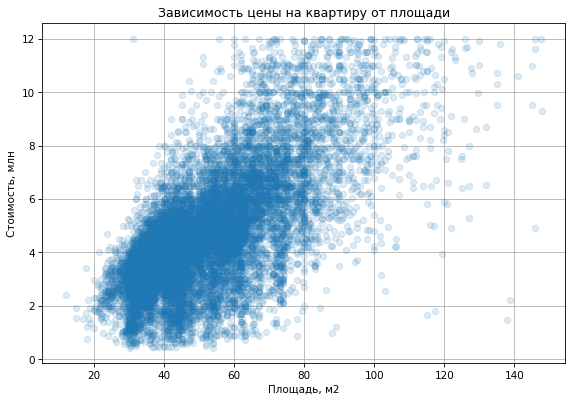

Коэффициент корреляции равен 68.25%


In [21]:
#Зависимость цены от квадратного метра

plt.figure(figsize=(9, 6), dpi=75)
plt.title("Зависимость цены на квартиру от площади")
plt.plot(good_data['total_area'], good_data['last_price']/1E6, marker='o', alpha=0.15, linestyle='')
plt.grid(True)
plt.xlabel("Площадь, м2")
plt.ylabel("Стоимость, млн")
plt.show();

s1 = good_data['last_price']
s2 = good_data['total_area']
coeff_corr = s1.corr(s2)
print("Коэффициент корреляции равен {:.2%}".format(coeff_corr))

##### Зависимость цены на квартиру от количества комнат

Коэффициент корреляции равен 41.91%


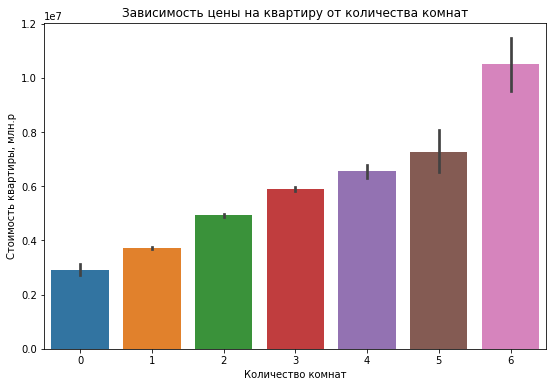

In [22]:
plt.figure(figsize=(9,6))
sns.barplot(x='rooms', y='last_price', data=good_data)

s1 = good_data['last_price']
s3 = good_data['rooms']

plt.title('Зависимость цены на квартиру от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры, млн.р')

coeff_corr = s1.corr(s3)
print("Коэффициент корреляции равен {:.2%}".format(coeff_corr))

#### Зависимость цены на квартиру от этажа, на котором расположена квартира

Text(0, 0.5, 'Стоимость квартиры, млн.р')

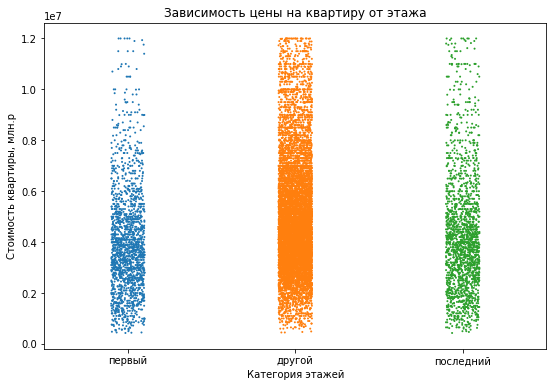

In [48]:
plt.figure(figsize=(9,6))
sns.stripplot(x="floor_group", y="last_price", data=good_data, jitter=True, dodge=True, size=2)
plt.title('Зависимость цены на квартиру от этажа')
plt.xlabel('Категория этажей')
plt.ylabel('Стоимость квартиры, млн.р')

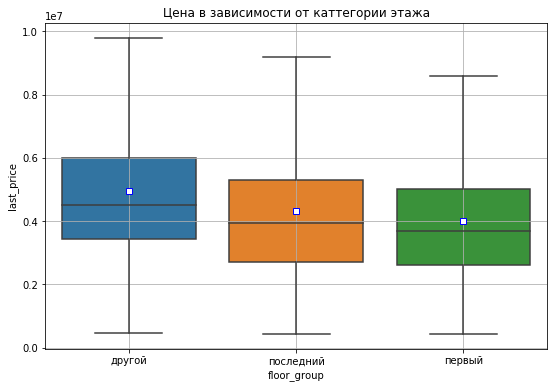

In [24]:
import seaborn as sns
#сортировка по медиане
tmp = \
    good_data\
    .groupby('floor_group', as_index=False)\
    .agg({'last_price':'median'})\
    .sort_values(by='last_price', ascending=False).reset_index()

plt.figure(figsize=(9,6))
sns.boxplot(x='floor_group', y= 'last_price', data=good_data, showfliers=False, order=tmp['floor_group'].to_list(), 
            showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
plt.title('Цена в зависимости от каттегории этажа')
plt.grid(True)
plt.show()

<hr style="border: 2px solid orange;" />

#### Зависимость цены на квартиру от расстояния до центра

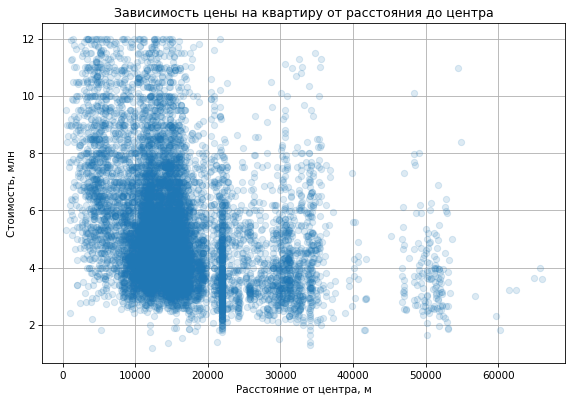

Коэффициент корреляции равен -32.50%


In [26]:
plt.figure(figsize=(9, 6), dpi=75)
plt.title("Зависимость цены на квартиру от расстояния до центра")
plt.plot(good_data['cityCenters_nearest'], good_data['last_price']/1E6, marker='o', alpha=0.15, linestyle='')
plt.grid(True)
plt.xlabel("Расстояние от центра, м")
plt.ylabel("Стоимость, млн")
plt.show();

s1 = good_data['last_price']
s3 = good_data['cityCenters_nearest']
coeff_corr = s1.corr(s3)
print("Коэффициент корреляции равен {:.2%}".format(coeff_corr))

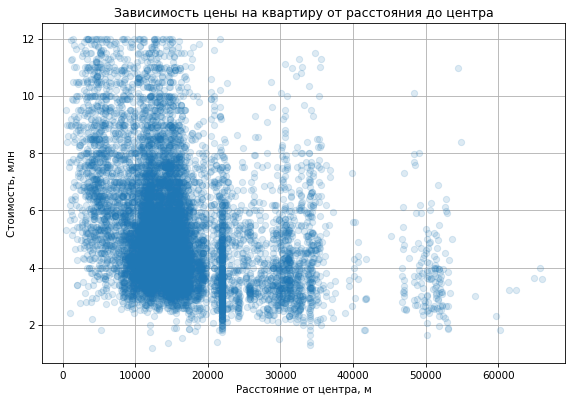

In [27]:
plt.figure(figsize=(9, 6), dpi=75)
plt.title("Зависимость цены на квартиру от расстояния до центра")
plt.plot(good_data['cityCenters_nearest'], good_data['last_price']/1E6, marker='o', alpha=0.15, linestyle='')
plt.grid(True)
plt.xlabel("Расстояние от центра, м")
plt.ylabel("Стоимость, млн")
plt.show();

<hr style="border: 2px solid red;" />

#### Зависимость цены на квартиру  от дня недели, месяца, года публикации

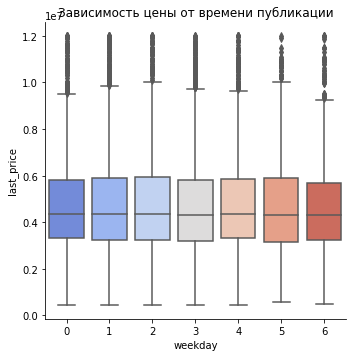

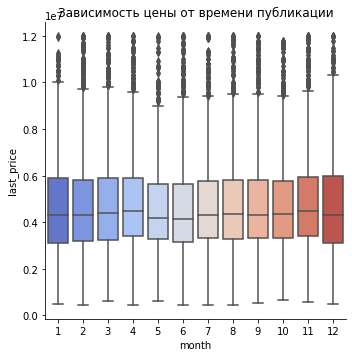

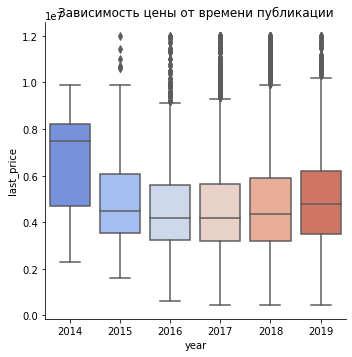

In [29]:
for column in [ 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data, palette='coolwarm')
    plt.title('Зависимость цены от времени публикации')

### Вывод

Наибольшая зависимость цены наблюдается от площади квартиры. Коэффициент корреляции около 68%. 
Также наблюдается положительная зависимость цены от кол-ва комнат. Коэффициент корреляции составляет около 42%.
Исходя из графика наиболее дорогие квартиры на этажах посередине. На первом этаже  наименее дорогие квартиры.
Чем дальше квартира, тем ниже её стоимость. Коэффицент корреляции составляет -33%.
День недели не влияет на стоимость продажи квартиры. Квартиры немного хуже продаются летом и осенью. В 2014 году квартиры продавались по стоимости выше. После 2017 года наблюдается рост цены. 


###  10 населённых пунктов с наибольшим числом объявлений

In [30]:
(data
    .groupby(['locality_name'])
    .agg({'locality_name': 'count', 'price_m2' : ['mean', 'min', 'max']})
    .sort_values(by=[('locality_name', 'count')], ascending=False)
    .head(10))

locality_name       price_m2                      
                        count           mean       min         max
locality_name                                                     
Санкт-Петербург         15714  114841.519185    111.83  1907500.00
 Мурино                   554   85576.754278  50000.00   138580.25
 Шушары                   439   78688.018907  47700.42   147826.09
Всеволожск                397   68627.308287  31400.00   640422.35
Пушкин                    369  103125.819377  59836.07   256521.74
Колпино                   338   75424.579112  47957.37   125000.00
 Парголово                327   90175.913089  39205.96   138522.43
Гатчина                   307   68746.146515  10507.25   146315.79
 Кудрово                  299   92473.547559  54160.35   142857.14
Выборг                    237   58141.909325  18750.00   107473.12

### Вывод

Наибольшее число объявлений о продаже квартиры в Санкт-Петербурге. Далее идёт город в Ленинградской области Мурино и поселок Шушары. Наиболее дорогие квартиры в Санкт-Петербурге, г. Пушкин и г. Кудрово. Самая дешёвая и дорогая квартиры представлены  в Санкт-Петербурге.

### Определение центральной зоны

##### Добавлен столбец расстояние до центра, в км

In [31]:
good_data['km_to_citycenter'] = round(good_data['cityCenters_nearest'] / 1000, 0)

##### Выделены квартиры в Санкт-Петербурге

In [32]:
good_data_locality_Spb = good_data.query('locality_name == "Санкт-Петербург"')

##### Изменен тип столбца, построена сводная таблица

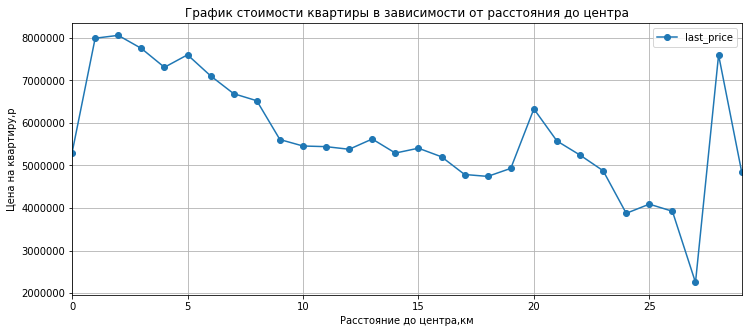

In [33]:
good_data['km_to_citycenter'] = good_data['km_to_citycenter'].astype('int', errors='ignore')

near_to_Spb = good_data_locality_Spb.pivot_table(index='km_to_citycenter', values=['last_price'], aggfunc='mean')
ax = near_to_Spb.plot(grid=True,marker = 'o', figsize=(12, 5))

ax.set(title = 'График стоимости квартиры в зависимости от расстояния до центра')
ax.set_xlabel('Расстояние до центра,км')
ax.set_ylabel('Цена на квартиру,р')

center_of_Spb =  good_data[(good_data['km_to_citycenter'] <= 10) & (good_data['locality_name'] == 'Санкт-Петербург')]

### Вывод

На основании графика можно сделать вывод, что центральная зона заканчивается на 10 км, на графике прекращается резкий спад. 

### Сравнение характеристик квартир в Санкт-Петербурге с общими выводами

#### Сравнение размеров площади квартир в Спб и Ленинградской области

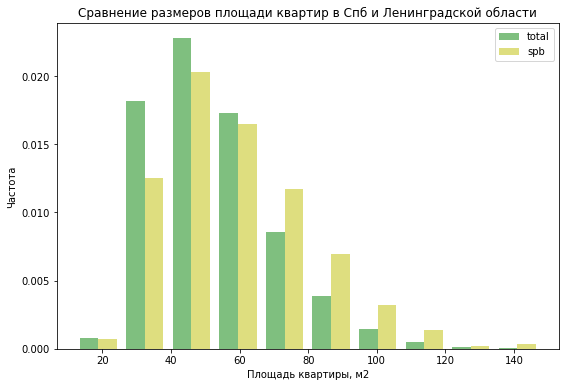

In [50]:
plt.figure(figsize=(9,6))
plt.hist([good_data['total_area'], center_of_Spb['total_area']], color=['g','y'], alpha=0.5, bins=10,density=True, label=['total', 'spb']);
plt.title("Сравнение размеров площади квартир в Спб и Ленинградской области")
plt.xlabel("Площадь квартиры, м2")
plt.ylabel("Частота")
plt.legend()
plt.show();

#### Сравнение стоимости квартир в Спб и Ленинградской области

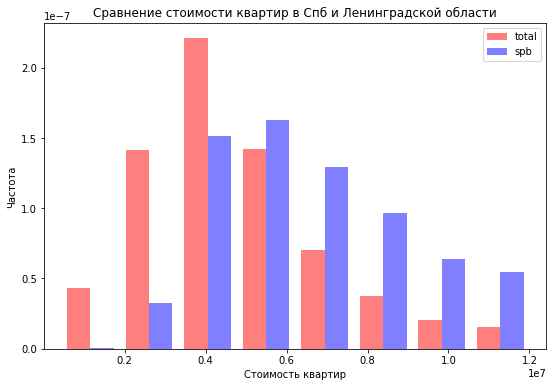

In [52]:
plt.figure(figsize=(9,6))
plt.hist([good_data['last_price'], center_of_Spb['last_price']], color=['r','b'], alpha=0.5, bins=8,density=True, label=['total', 'spb']);
plt.title("Сравнение стоимости квартир в Спб и Ленинградской области")
plt.xlabel("Стоимость квартир")
plt.ylabel("Частота")
plt.legend()
plt.show();

####  Сравнение количества комнат в Спб и Ленинградской области

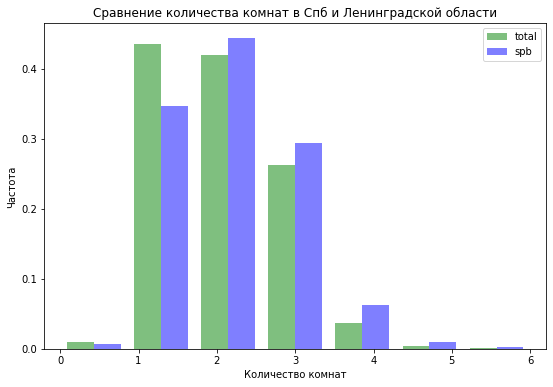

In [54]:
plt.figure(figsize=(9,6))
plt.hist([good_data['rooms'], center_of_Spb['rooms']], color=['g','b'], alpha=0.5, bins = 7,density=True, label=['total', 'spb']);
plt.title("Сравнение количества комнат в Спб и Ленинградской области")
plt.xlabel("Количество комнат")
plt.ylabel("Частота")
plt.legend()
plt.show();

####  Сравнение высоты потолков в квартирах в Спб и Ленинградской области

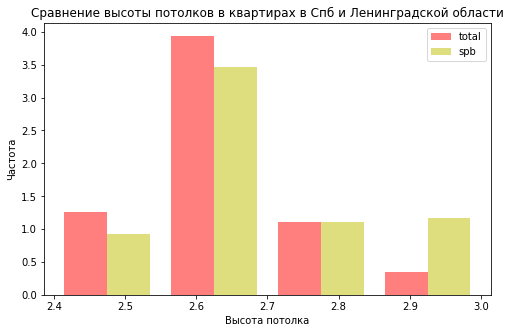

In [55]:
plt.figure(figsize=(8,5))
plt.hist([good_data['ceiling_height'], center_of_Spb['ceiling_height']], color=['r','y'], alpha=0.5, bins = 4, density=True, label=['total', 'spb']);
plt.title("Сравнение высоты потолков в квартирах в Спб и Ленинградской области")
plt.xlabel("Высота потолка")
plt.ylabel("Частота")
plt.legend()
plt.show();

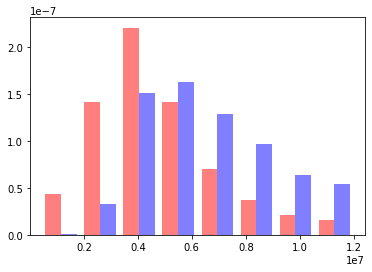

In [38]:
plt.hist([good_data['last_price'], center_of_Spb['last_price']], color=['r','b'], alpha=0.5, bins=8, density=True);

### Вывод

На основании построенных гистограмм можно сделать следующие выводы:

- В Санкт-Петербурге почти одинаковым спросом пользуются квартиры с площадью от 40 до 60 кв.м.
- Выше уровень цен на квартиры. Квартиры, в основном, стоят около 6 млн.
- Спросом пользуются 2-х комнатные квартиры.
- С потолками наблюдается одинаковая тенденция. Самые часто встречаемые с высотой - 2.65 м.

#### Зависимость цены на квартиру от площади в Санкт-Петербурге

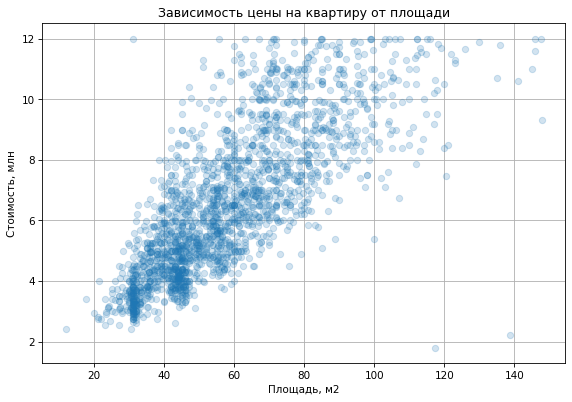

Коэффициент корреляции равен 76.56%


In [39]:
plt.figure(figsize=(9, 6), dpi=75)
plt.title("Зависимость цены на квартиру от площади")
plt.plot(center_of_Spb['total_area'], center_of_Spb['last_price']/1E6, marker='o', alpha=0.2, linestyle='')
plt.grid(True)
plt.xlabel("Площадь, м2")
plt.ylabel("Стоимость, млн")
plt.show();

s1 = center_of_Spb['last_price']
s2 = center_of_Spb['total_area']
coeff_corr = s1.corr(s2)
print("Коэффициент корреляции равен {:.2%}".format(coeff_corr))

#### Зависимость цены от кол-ва комнат в Санкт-Петербурге

Коэффициент корреляции равен 50.11%


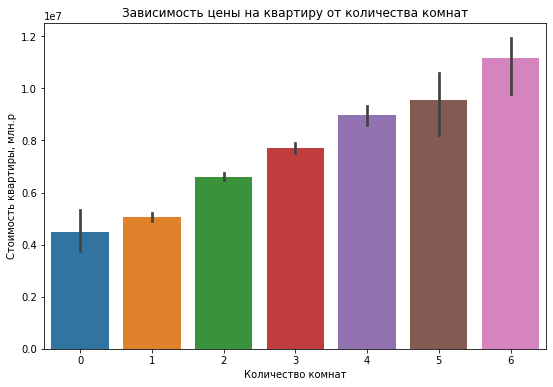

In [40]:
plt.figure(figsize=(9,6))
sns.barplot(x='rooms', y='last_price', data=center_of_Spb)

s1 = center_of_Spb['last_price']
s3 = center_of_Spb['rooms']

plt.title('Зависимость цены на квартиру от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры, млн.р')

coeff_corr = s1.corr(s3)
print("Коэффициент корреляции равен {:.2%}".format(coeff_corr))

#### Зависимость цены от этажа, на котором расположена квартира в Санкт-Петербурге

Text(0, 0.5, 'Стоимость квартиры, млн.р')

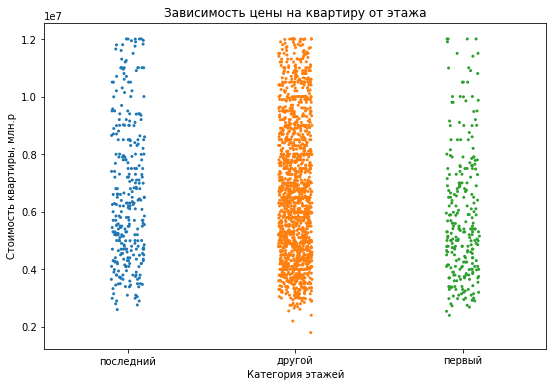

In [41]:
plt.figure(figsize=(9,6))
sns.stripplot(x="floor_group", y="last_price", data=center_of_Spb, jitter=True, dodge=True, size=3)
plt.title('Зависимость цены на квартиру от этажа')
plt.xlabel('Категория этажей')
plt.ylabel('Стоимость квартиры, млн.р')

#### Зависимость цены от удаленности от центра в Санкт-Петербурге

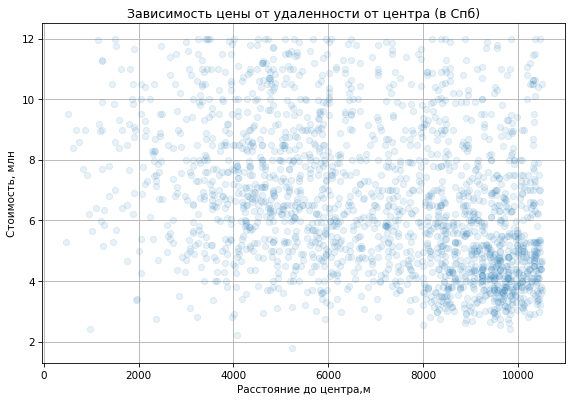

Коэффициент корреляции равен -35.46%


In [42]:
plt.figure(figsize=(9, 6), dpi=75)
plt.title("Зависимость цены от удаленности от центра (в Спб)")
plt.plot(center_of_Spb['cityCenters_nearest'], center_of_Spb['last_price']/1E6, marker='o', alpha=0.1, linestyle='')
plt.grid(True)
plt.xlabel("Расстояние до центра,м")
plt.ylabel("Стоимость, млн")
plt.show();

s1 = center_of_Spb['last_price']
s2 = center_of_Spb['cityCenters_nearest']
coeff_corr = s1.corr(s2)
print("Коэффициент корреляции равен {:.2%}".format(coeff_corr))

#### Зависимость цены на квартиру от дня недели публикации в Санкт-Петербурге

Text(0.5, 1.0, 'Зависимость цены от дня недели публикации в Санкт-Петербурге')

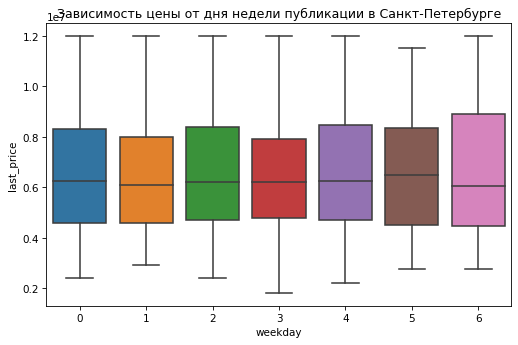

In [43]:
plt.figure(figsize=(8, 5), dpi=75)
sns.boxplot(x = 'weekday', y = 'last_price', data = center_of_Spb)
plt.title('Зависимость цены от дня недели публикации в Санкт-Петербурге')

#### Зависимость цены на квартиру от месяца публикации в Санкт-Петербурге

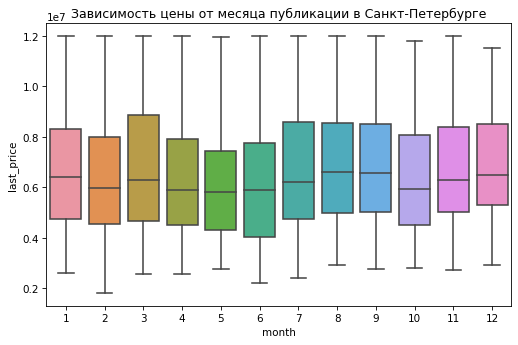

In [44]:
plt.figure(figsize=(8, 5), dpi=75)
plt.title('Зависимость цены от месяца публикации в Санкт-Петербурге')
sns.boxplot(x = 'month', y = 'last_price', data = center_of_Spb)

#### Зависимость цены на квартиру от года публикации в Санкт-Петербурге

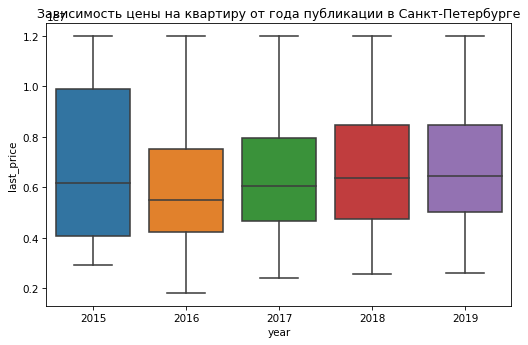

In [45]:
plt.figure(figsize=(8, 5), dpi=75)
plt.title('Зависимость цены на квартиру от года публикации в Санкт-Петербурге')
sns.boxplot(x = 'year', y = 'last_price', data = center_of_Spb)

### Вывод

Также как и по Ленинградской области наибольшая зависимость цены наблюдается от площади квартиры.
Коэффициент корреляции цены от количества комнат увеличился и составляет около 50%, что свидетельствует о том, что в Санкт-Петербурге сильнее выражена зависимость цены от числа комнат.
Также как и по области наиболее предпочительными являются не первые и не последние этажи.
Чем дальше квартира от центра города, тем квартира будет стоить дешевле.
В 2015 году квартиры продавались по стоимости выше, особенно в осенний период.

### Шаг 5. Общий вывод

У многих объявлений обнаружились аномальные значения по некоторым данным. Установлены следующие параметры, чтобы в дальнейшем выбросы не мешали анализу. 
- Площадь квартиры ограничена 150 кв.м.
- Лимит для цены квартиры -  12 млн.
- Число комнат не превышает 6. 
- Высота потолков лежит в диапазоне от 2.4 - 3 
- Слишком быстрые продажи до 1.5 месяца. Слишком долгие - свыше 8 месяцев.

Из проведенного анализа можно сделать следующие выводы. Основные факторы, влияющие на стоимость квартиры:

- Площадь квартиры
- Расстояние до центра города. Разница между 1 и 5 км - 2млн.
- Количество комнат. Сильнее эта зависимость наблюдается в Санкт-Петербурге
- Этаж квартиры. Цена падает,если квартира располагается на первом этаже.
- Время размещения не сильно влияет на стоимость квартиры. 